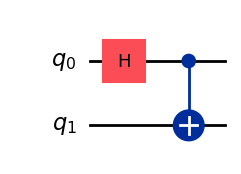

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0, 1)
qc1.draw("mpl", style="iqp")

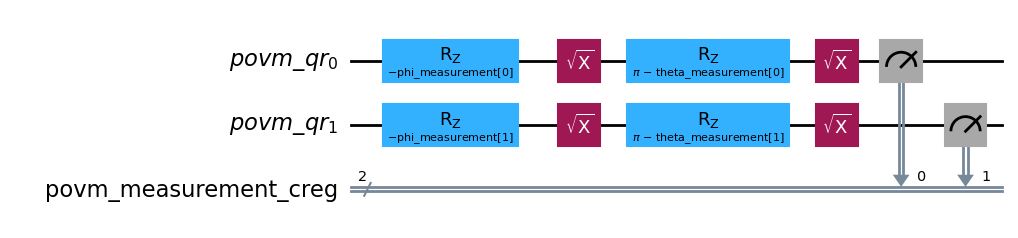

In [2]:
from povm_toolbox.library import ClassicalShadows

shots1 = 1280
measurement1 = ClassicalShadows(num_qubits=2, seed=43)
measurement1.measurement_circuit.draw("mpl")

In [3]:
pub1 = (qc1, None, shots1, measurement1)

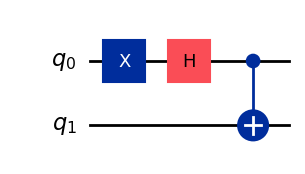

In [4]:
qc2 = QuantumCircuit(2)
qc2.x(0)
qc2.h(0)
qc2.cx(0, 1)
qc2.draw("mpl", style="iqp")

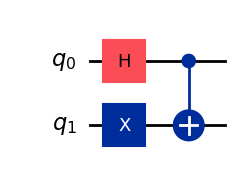

In [5]:
qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.x(1)
qc3.cx(0, 1)
qc3.draw("mpl", style="iqp")

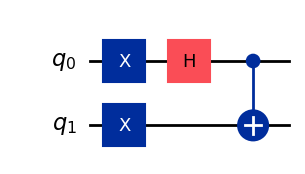

In [6]:
qc4 = QuantumCircuit(2)
qc4.x(0)
qc4.x(1)
qc4.h(0)
qc4.cx(0, 1)
qc4.draw("mpl", style="iqp")

In [7]:
# All of the following syntax are equivalent:

pub2 = (qc2, None)  # or (qc2, None, None) or (qc2, None, None, None)
pub3 = (qc3,)
pub4 = qc4

In [8]:
shots_default = 4096
measurement_default = ClassicalShadows(num_qubits=2, seed=78)

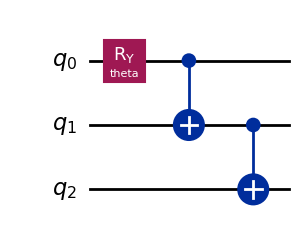

In [9]:
import numpy as np

qc5 = QuantumCircuit(3)

theta = Parameter("theta")
qc5.ry(theta, 0)
qc5.cx(0, 1)
qc5.cx(1, 2)
qc5.draw("mpl", style="iqp")

In [10]:
# Set 4 different values for theta
parameter_values = np.array([0.0, 0.4, 0.5 * np.pi, np.pi])

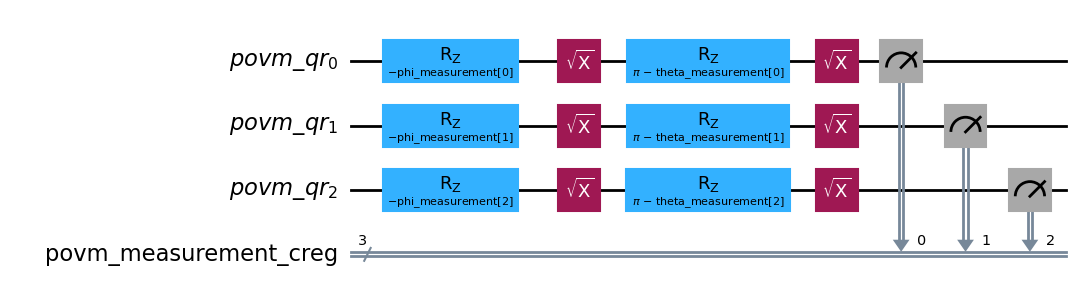

In [19]:
shots5 = 8192
measurement5 = ClassicalShadows(num_qubits=3, seed=917431)
measurement5.measurement_circuit.draw("mpl")

In [20]:
pub5 = (qc5, parameter_values, shots5, measurement5)

In [21]:
from povm_toolbox.sampler import POVMSampler
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler(seed=91)
povm_sampler = POVMSampler(sampler=sampler)

In [22]:
job = povm_sampler.run(
    [pub1, pub2, pub3, pub4, pub5], shots=shots_default, povm=measurement_default
)
result = job.result()
print(result)

PrimitiveResult([POVMPubResult(data=DataBin(povm_measurement_creg=BitArray(<shape=(), num_shots=128, num_bits=2>)), metadata=RPMMetadata(povm_implementation=ClassicalShadows(num_qubits=2), composed_circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f6a314a8f70>, pvm_keys=np.ndarray<128,2>)), POVMPubResult(data=DataBin(povm_measurement_creg=BitArray(<shape=(), num_shots=2048, num_bits=2>)), metadata=RPMMetadata(povm_implementation=ClassicalShadows(num_qubits=2), composed_circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f6a314a8460>, pvm_keys=np.ndarray<2048,2>)), POVMPubResult(data=DataBin(povm_measurement_creg=BitArray(<shape=(), num_shots=2048, num_bits=2>)), metadata=RPMMetadata(povm_implementation=ClassicalShadows(num_qubits=2), composed_circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f6a314a80d0>, pvm_keys=np.ndarray<2048,2>)), POVMPubResult(data=DataBin(povm_measurement_creg=BitArray(<shape=(), num_shots=2048, num_bits=2>)), met

In [23]:
for pub_result in result:
    print(pub_result.get_counts())

[Counter({(2, 2): 19, (0, 0): 18, (5, 2): 17, (1, 4): 16, (5, 0): 16, (3, 0): 14, (3, 4): 13, (5, 4): 9, (1, 2): 6})]
[Counter({(5, 2): 250, (3, 0): 238, (1, 2): 237, (4, 4): 237, (5, 0): 231, (3, 4): 221, (0, 0): 219, (3, 2): 218, (1, 4): 197})]
[Counter({(5, 2): 262, (4, 4): 236, (5, 0): 236, (3, 4): 232, (1, 0): 229, (3, 0): 221, (2, 2): 217, (1, 2): 216, (1, 4): 199})]
[Counter({(5, 2): 255, (3, 2): 249, (3, 4): 233, (1, 4): 228, (1, 2): 222, (5, 4): 220, (5, 0): 220, (3, 0): 212, (1, 0): 209})]
[Counter({(2, 5, 4): 177, (2, 3, 4): 166, (0, 3, 2): 166, (4, 3, 2): 164, (0, 0, 4): 162, (4, 0, 0): 161, (0, 5, 2): 159, (3, 0, 2): 157, (2, 5, 2): 155, (0, 2, 0): 155, (5, 0, 2): 155, (3, 4, 0): 154, (4, 5, 2): 153, (3, 0, 4): 153, (0, 4, 0): 152, (2, 0, 0): 151, (0, 0, 2): 150, (0, 5, 4): 148, (0, 3, 4): 147, (5, 2, 0): 146, (4, 3, 4): 144, (5, 4, 0): 144, (2, 3, 2): 143, (3, 2, 0): 139, (5, 0, 4): 135, (0, 0, 0): 135, (4, 5, 4): 125})
 Counter({(4, 3, 4): 180, (0, 3, 2): 178, (4, 5, 4):

In [24]:
from povm_toolbox.post_processor import POVMPostProcessor
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])

post_processor1 = POVMPostProcessor(result[0])
exp_value, std = post_processor1.get_expectation_value(observable=observable)
print(exp_value)

for pub_result in result[1:4]:
    post_processor = POVMPostProcessor(pub_result)
    exp_value, std = post_processor.get_expectation_value(observable=observable)
    print(exp_value)

4.234374999999999
-0.037109375000000666
-0.08984374999999956
-0.045898437499999625


In [25]:
post_processor5 = POVMPostProcessor(result[4])
observable = SparsePauliOp(
    ["IIZ", "IXX", "YIY", "ZZI", "XXX", "XYZ"], coeffs=[1, 1, -1, 1, 0.5, -2]
)
exp_value, std = post_processor5.get_expectation_value(observable=observable)
print(exp_value)

[ 2.33459473  1.69702148  2.86486816 -4.02648926]


In [26]:
exp_value, std = post_processor5.get_expectation_value(observable=observable, loc=(1))
print(exp_value, "\u00b1", std)

1.6970214843749987 ± 0.19125466530716817


In [30]:
observable.paulis[1].to_matrix()

array([[0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
        0. +0.j],
       [0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
        0. +0.j],
       [0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
        0. +0.j],
       [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
        0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
        0.5+0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j,
        0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
        0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
        0. +0.j]])